In [282]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import seaborn as sns  # For statistical data visualization
import geopandas as gpd  # For geospatial data handling and plotting
import plotly.express as px  # For interactive plots

In [3]:
# Load the cleaned birthrates dataset from a CSV file into a pandas DataFrame
df = pd.read_csv(r'C:\Users\GonDesktop\Documents\Github\PortfolioProjects\BirthRate_SQLProject\birthrates_cleaned.csv')

In [5]:
# Display the first 5 rows of the DataFrame to inspect the data
df.head()

,Country,Code,Year,Birthrate,Deathrate,Population,Continent
0,Afghanistan,AFG,1950,49.38,37.42,7776182,Asia
1,Afghanistan,AFG,1951,49.62,36.65,7879343,Asia
2,Afghanistan,AFG,1952,49.78,36.06,7987783,Asia
3,Afghanistan,AFG,1953,49.98,35.53,8096703,Asia
4,Afghanistan,AFG,1954,50.00,35.23,8207953,Asia


In [43]:
# Set the global display format for floating point numbers to show two decimal places
pd.options.display.float_format = '{:.2f}'.format

In [7]:
# Display a summary of the DataFrame, including the number of entries, columns, data types, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17538 entries, 0 to 17537
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     17538 non-null  object 
 1   Code        17538 non-null  object 
 2   Year        17538 non-null  int64  
 3   Birthrate   17538 non-null  float64
 4   Deathrate   17538 non-null  float64
 5   Population  17538 non-null  int64  
 6   Continent   17538 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 959.2+ KB


In [9]:
# Generate descriptive statistics for the numerical columns in the DataFrame
df.describe()

,Year,Birthrate,Deathrate,Population
count,17538.000000,17538.000000,17538.000000,1.753800e+04
mean,1986.500000,28.683098,11.145336,2.153492e+07
std,21.360618,13.506555,6.274670,9.574493e+07
min,1950.000000,3.520000,0.840000,5.010000e+02
25%,1968.000000,16.380000,7.040000,2.204702e+05
50%,1986.500000,27.590000,9.500000,3.135062e+06
75%,2005.000000,41.240000,13.350000,1.089016e+07
max,2023.000000,58.630000,153.960000,1.438070e+09


In [11]:
#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
# Check for missing (null) values in each column and return the count of null values
df.isnull().sum()

Country       0
Code          0
Year          0
Birthrate     0
Deathrate     0
Population    0
Continent     0
dtype: int64

In [15]:
# Get the number of unique values in each column of the DataFrame
df.nunique()

Country         237
Code            237
Year             74
Birthrate      4613
Deathrate      2725
Population    17403
Continent         6
dtype: int64

In [17]:
# Display the names of all columns in the DataFrame
df.columns

Index(['Country', 'Code', 'Year', 'Birthrate', 'Deathrate', 'Population',
       'Continent'],
      dtype='object')

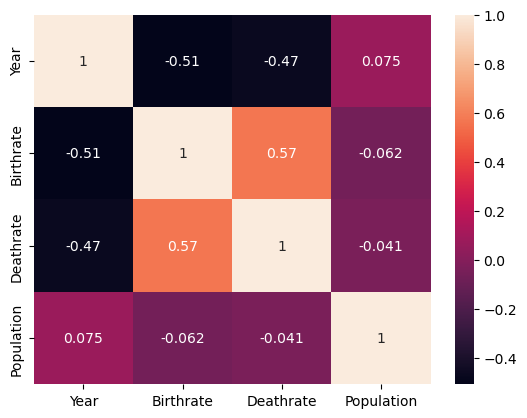

In [19]:
# Create a heatmap of the correlation matrix for numerical columns
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Set the figure size for the plot (width = 20, height = 7)
plt.rcParams['figure.figsize'] = (20, 7)

# Display the plot
plt.show()

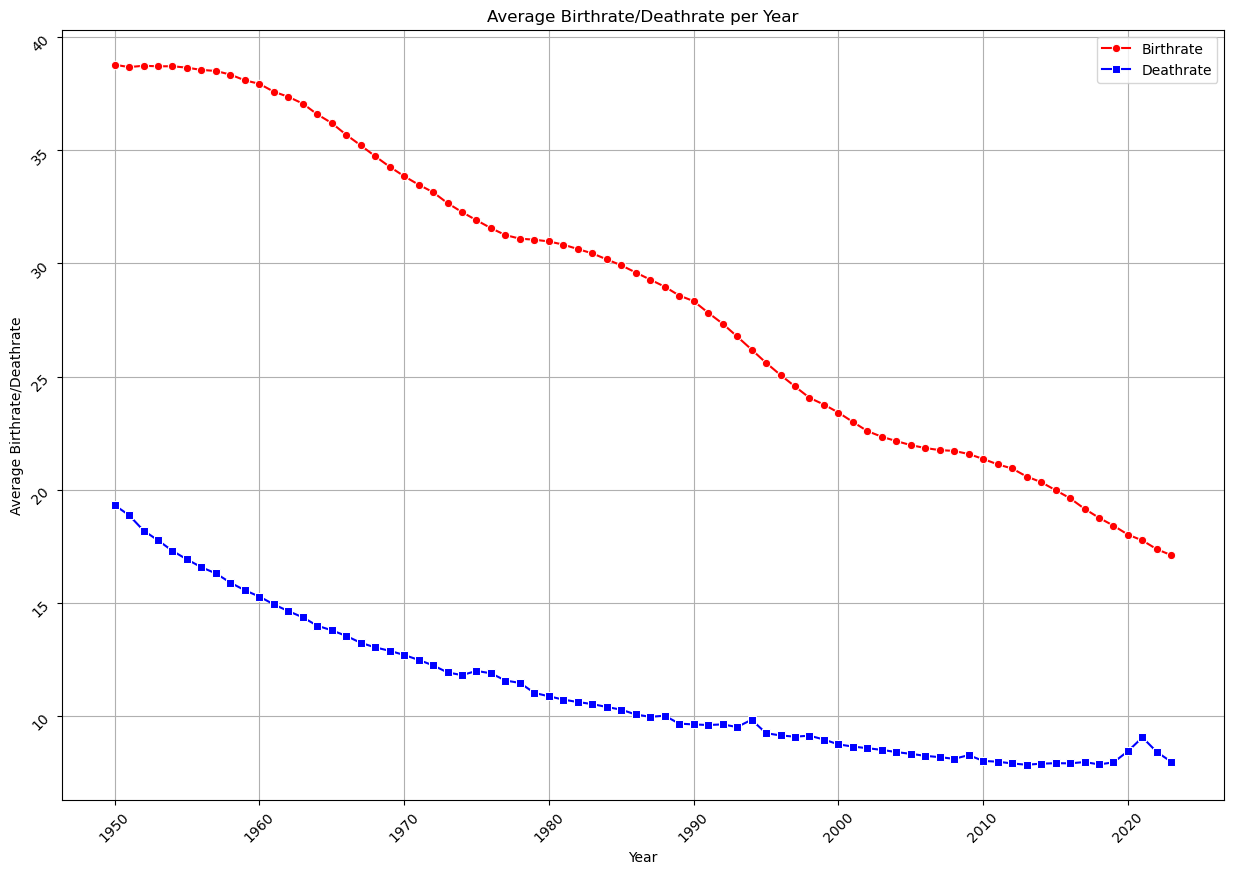

In [66]:
#birthrate_avg = df.groupby('Year')['Birthrate'].mean()
#deathrate_avg = df.groupby('Year')['Deathrate'].mean()

# Create a figure with a specific size (15 inches wide and 10 inches tall)
plt.figure(figsize=(15, 10))
# Plot the average birthrate per year with red color and circular markers
sns.lineplot(x=birthrate_avg.index, y=birthrate_avg.values, label='Birthrate', color='r', marker='o')
# Plot the average deathrate per year with blue color and square markers
sns.lineplot(x=deathrate_avg.index, y=deathrate_avg.values, label='Deathrate', color='blue', marker='s')
# Enable grid for better readability of the plot
plt.grid(True)
# Rotate the x-axis labels by 45 degrees for better visibility
plt.xticks(rotation=45)
# Rotate the y-axis labels by 45 degrees for better readability
plt.yticks(rotation=45)
# Label the x-axis as "Year"
plt.xlabel('Year')
# Label the y-axis as "Average Birthrate/Deathrate"
plt.ylabel('Average Birthrate/Deathrate')
# Set the title of the plot
plt.title('Average Birthrate/Deathrate per Year')
# Display the plot
plt.show()

In [25]:
# Display the unique values in the 'Continent' column
df["Continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [27]:
# Filter the DataFrame to include only rows where the continent is Africa
df_africa = df[df["Continent"] == "Africa"]
# Filter the DataFrame to include only rows where the continent is Asia
df_asia = df[df["Continent"] == "Asia"]
# Filter the DataFrame to include only rows where the continent is Europe
df_europe = df[df["Continent"] == "Europe"]
# Filter the DataFrame to include only rows where the continent is Oceania
df_oceania

In [29]:
# Calculate the average deathrate per year for each continent
africa_deathrate_avg = df_africa.groupby('Year')['Deathrate'].mean()
asia_deathrate_avg = df_asia.groupby('Year')['Deathrate'].mean()
europe_deathrate_avg = df_europe.groupby('Year')['Deathrate'].mean()
oceania_deathrate_avg = df_oceania.groupby('Year')['Deathrate'].mean()
northamerica_deathrate_avg = df_northamerica.groupby('Year')['Deathrate'].mean()
southamerica_deathrate_avg = df_southamerica.groupby('Year')['Deathrate'].mean()

In [31]:
# Calculate the average birthrate per year for each continent
africa_birthrate_avg = df_africa.groupby('Year')['Birthrate'].mean()
asia_birthrate_avg = df_asia.groupby('Year')['Birthrate'].mean()
europe_birthrate_avg = df_europe.groupby('Year')['Birthrate'].mean()
oceania_birthrate_avg = df_oceania.groupby('Year')['Birthrate'].mean()
northamerica_birthrate_avg = df_northamerica.groupby('Year')['Birthrate'].mean()
southamerica_birthrate_avg = df_southamerica.groupby('Year')['Birthrate'].mean()

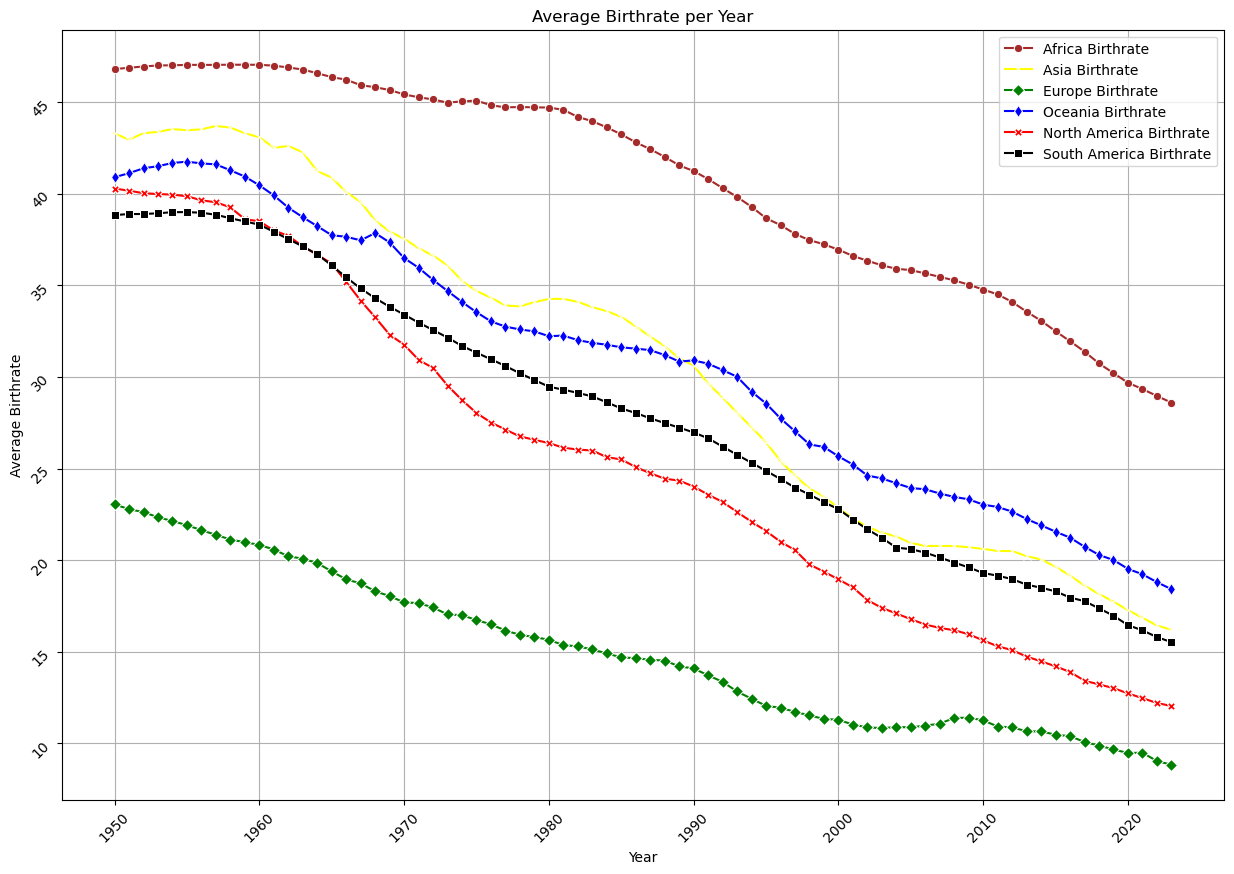

In [33]:
# Plot the average birthrate per year for each continent
plt.figure(figsize=(15, 10))
# Line plots for each continent with different colors and markers
sns.lineplot(x=africa_birthrate_avg.index, y=africa_birthrate_avg.values, label='Africa Birthrate', color='brown', marker='o')
sns.lineplot(x=asia_birthrate_avg.index, y=asia_birthrate_avg.values, label='Asia Birthrate', color='yellow', marker='x')
sns.lineplot(x=europe_birthrate_avg.index, y=europe_birthrate_avg.values, label='Europe Birthrate', color='green', marker='D')
sns.lineplot(x=oceania_birthrate_avg.index, y=oceania_birthrate_avg.values, label='Oceania Birthrate', color='blue', marker='d')
sns.lineplot(x=northamerica_birthrate_avg.index, y=northamerica_birthrate_avg.values, label='North America Birthrate', color='red', marker='X')
sns.lineplot(x=southamerica_birthrate_avg.index, y=southamerica_birthrate_avg.values, label='South America Birthrate', color='black', marker='s')
# Display grid lines on the plot
plt.grid(True)
# Rotate x and y axis labels for better readability
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Average Birthrate')
# Set the title of the plot
plt.title('Average Birthrate per Year')
# Display the plot
plt.show()

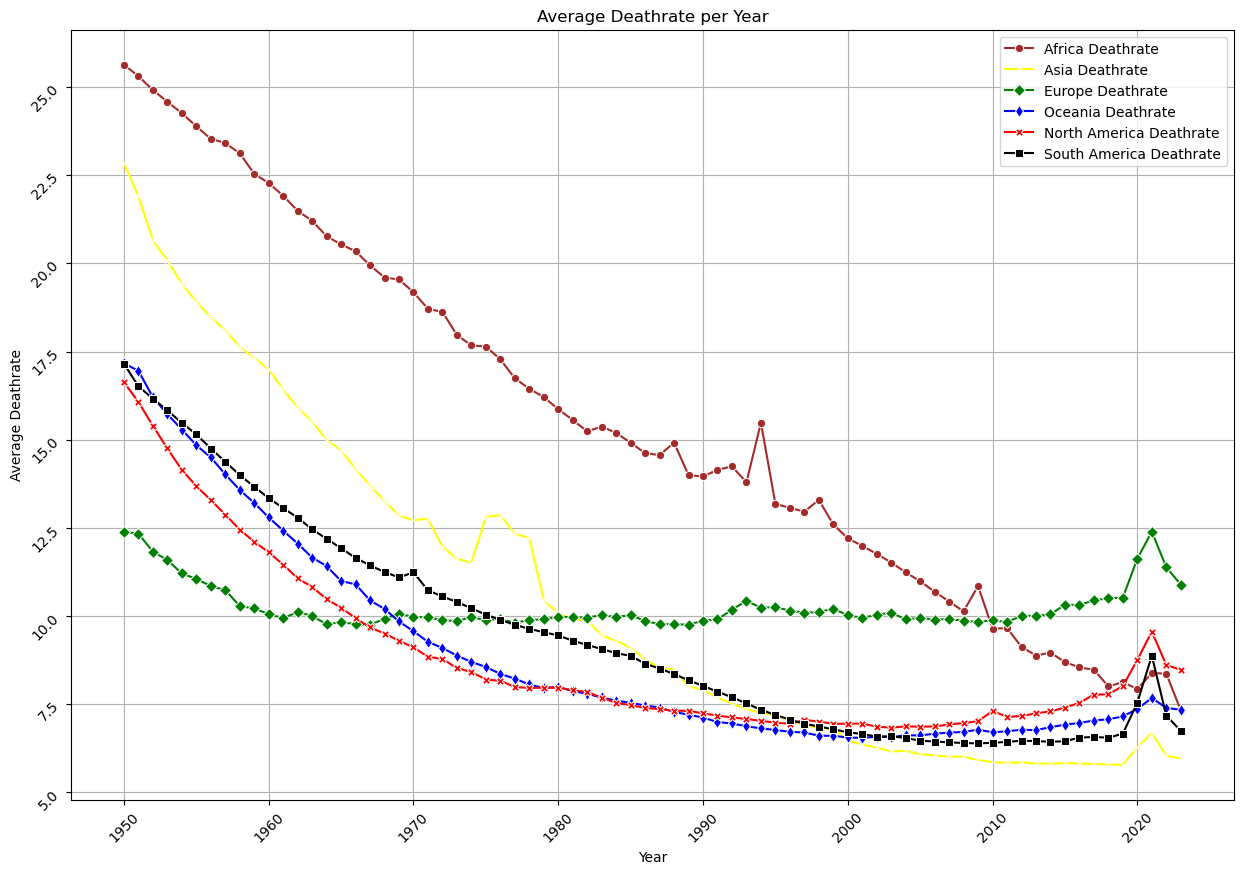

In [37]:
# Define the continents, colors, and markers to be used in the plot
continents = ["Africa", "Asia", "Europe", "Oceania", "North America", "South America"]
colors = ["brown", "yellow", "green", "blue", "red", "black"]
markers = ["o", "x", "D", "d", "X", "s"]

# Create a dictionary with the average deathrate per year for each continent
deathrate_avg = {
    continent: df[df["Continent"] == continent].groupby("Year")["Deathrate"].mean()
    for continent in continents if continent in df["Continent"].values
}

# Plot all the lines in a loop for each continent
plt.figure(figsize=(15, 10))
for continent, color, marker in zip(deathrate_avg.keys(), colors, markers):
    sns.lineplot(
        x=deathrate_avg[continent].index, 
        y=deathrate_avg[continent].values, 
        label=f"{continent} Deathrate", 
        color=color, 
        marker=marker
    )

# Enable grid for better readability
plt.grid(True)
# Rotate x and y axis labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Label the axes
plt.xlabel("Year")
plt.ylabel("Average Deathrate")
# Set the title of the plot
plt.title("Average Deathrate per Year")
# Show the legend
plt.legend()
# Display the plot
plt.show()

In [54]:
# Calculate the maximum population per year for Africa
africa_population_max = df_africa.groupby('Year')['Population'].max()

In [56]:
africa_population_max

Year
1950     37283018
1951     37994083
1952     38716209
1953     39439812
1954     40176323
1955     40935636
1956     41716058
1957     42517478
1958     43324653
1959     44161685
1960     45053787
1961     45989311
1962     46965300
1963     47973577
1964     49012023
1965     50086763
1966     51188241
1967     52293067
1968     53432784
1969     54631918
1970     55893837
1971     57214688
1972     58601749
1973     60082138
1974     61679153
1975     63410822
1976     65258002
1977     67234590
1978     69326530
1979     71498241
1980     73764644
1981     76068116
1982     78378696
1983     80438257
1984     82526444
1985     84897972
1986     87235959
1987     89591718
1988     92020092
1989     94531021
1990     97120926
1991     99720162
1992    102372779
1993    105122075
1994    107935717
1995    110819431
1996    113754782
1997    116754791
1998    119846260
1999    123047322
2000    126382491
2001    129862594
2002    133471994
2003    137202647
2004    141057046
2005 

In [47]:
# Calculate the average population per year for Asia
asia_population_avg = df_asia.groupby('Year')['Population'].mean()

In [50]:
asia_population_avg

Year
1950   27351635.88
1951   27886204.18
1952   28478651.36
1953   29112686.14
1954   29768371.88
1955   30462928.24
1956   31165256.24
1957   31893504.80
1958   32637336.28
1959   33293948.70
1960   33835253.78
1961   34363130.84
1962   35066378.34
1963   35986102.36
1964   36948835.58
1965   37880601.92
1966   38803728.20
1967   39726164.08
1968   40695394.10
1969   41708572.88
1970   42738236.00
1971   43753454.68
1972   44756512.74
1973   45777051.56
1974   46787961.86
1975   47770215.92
1976   48729350.46
1977   49684583.88
1978   50636755.02
1979   51615111.58
1980   52632871.56
1981   53679982.60
1982   54773391.22
1983   55881140.48
1984   56989597.80
1985   58124652.74
1986   59297964.24
1987   60512835.22
1988   61732859.68
1989   62953875.48
1990   64181888.32
1991   65364151.82
1992   66496247.52
1993   67600798.64
1994   68673604.92
1995   69736358.82
1996   70796996.30
1997   71847358.48
1998   72886835.54
1999   73912411.86
2000   74936655.48
2001   75959081.96
2002   

In [58]:
# Calculate the total population per year for Asia
asia_population_sum = df_asia.groupby('Year')['Population'].sum()

In [60]:
asia_population_sum

Year
1950    1367581794
1951    1394310209
1952    1423932568
1953    1455634307
1954    1488418594
1955    1523146412
1956    1558262812
1957    1594675240
1958    1631866814
1959    1664697435
1960    1691762689
1961    1718156542
1962    1753318917
1963    1799305118
1964    1847441779
1965    1894030096
1966    1940186410
1967    1986308204
1968    2034769705
1969    2085428644
1970    2136911800
1971    2187672734
1972    2237825637
1973    2288852578
1974    2339398093
1975    2388510796
1976    2436467523
1977    2484229194
1978    2531837751
1979    2580755579
1980    2631643578
1981    2683999130
1982    2738669561
1983    2794057024
1984    2849479890
1985    2906232637
1986    2964898212
1987    3025641761
1988    3086642984
1989    3147693774
1990    3209094416
1991    3268207591
1992    3324812376
1993    3380039932
1994    3433680246
1995    3486817941
1996    3539849815
1997    3592367924
1998    3644341777
1999    3695620593
2000    3746832774
2001    3797954098
2002   

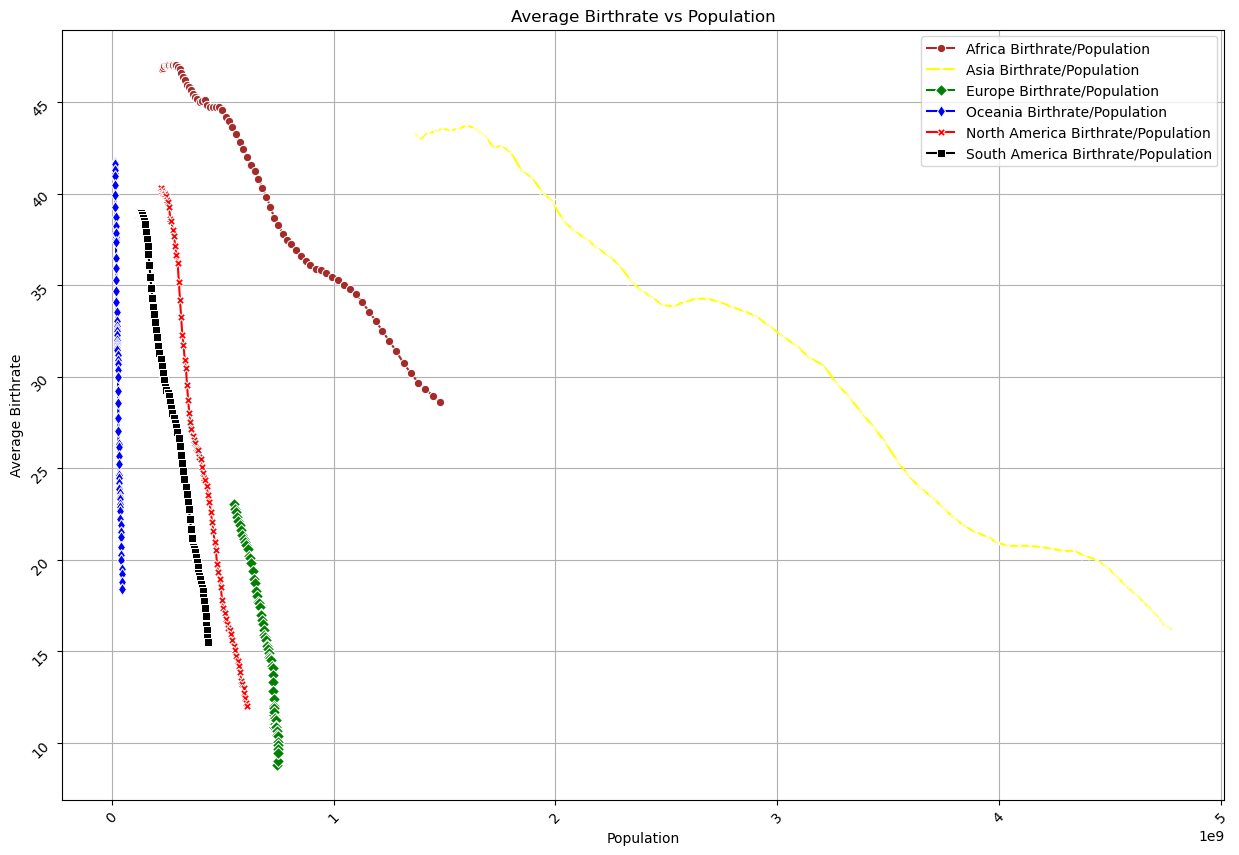

In [82]:
# Define continents, colors, and markers for the plot
continents = ["Africa", "Asia", "Europe", "Oceania", "North America", "South America"]
colors = ["brown", "yellow", "green", "blue", "red", "black"]
markers = ["o", "x", "D", "d", "X", "s"]

# Create a dictionary with the average birthrate per year for each continent
birthrate_avg = {
    continent: df[df["Continent"] == continent].groupby("Year")["Birthrate"].mean()
    for continent in continents if continent in df["Continent"].values
}

# Create a dictionary with the total population per year for each continent
population_sum = {
    continent: df[df["Continent"] == continent].groupby("Year")["Population"].sum()
    for continent in continents if continent in df["Continent"].values
}

# Plot all the lines in a loop for each continent, showing birthrate vs population
plt.figure(figsize=(15, 10))
for continent, color, marker in zip(birthrate_avg.keys(), colors, markers):
    sns.lineplot(
        x=population_sum[continent].values, 
        y=birthrate_avg[continent].values, 
        label=f"{continent} Birthrate/Population", 
        color=color, 
        marker=marker
    )

# Display grid for readability
plt.grid(True)
# Rotate the x and y axis labels for clarity
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Label the axes
plt.xlabel("Population")
plt.ylabel("Average Birthrate")
# Set the title of the plot
plt.title("Average Birthrate vs Population")
# Show the legend
plt.legend()
# Display the plot
plt.show()

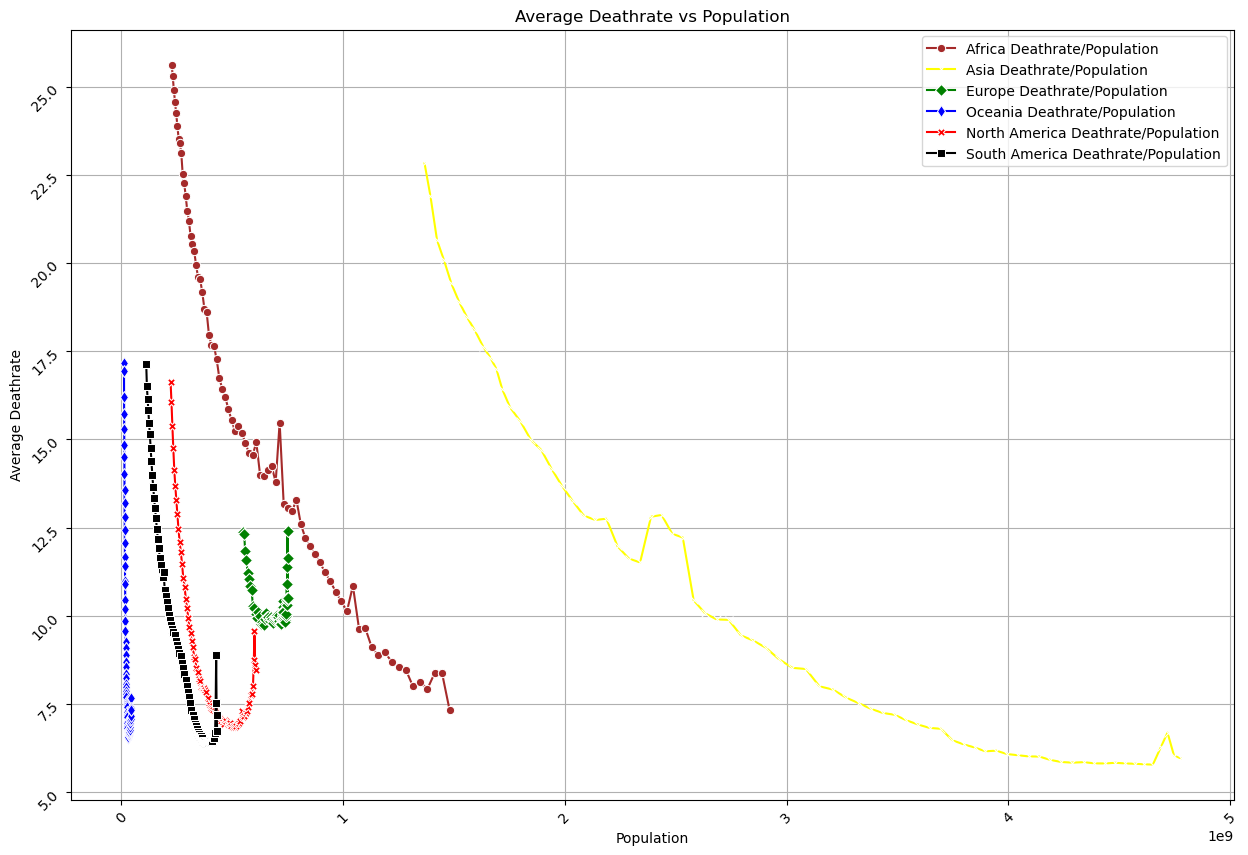

In [84]:
# Define continents, colors, and markers for the plot
continents = ["Africa", "Asia", "Europe", "Oceania", "North America", "South America"]
colors = ["brown", "yellow", "green", "blue", "red", "black"]
markers = ["o", "x", "D", "d", "X", "s"]

# Create a dictionary with the average deathrate per year for each continent
deathrate_avg = {
    continent: df[df["Continent"] == continent].groupby("Year")["Deathrate"].mean()
    for continent in continents if continent in df["Continent"].values
}

# Create a dictionary with the total population per year for each continent
population_sum = {
    continent: df[df["Continent"] == continent].groupby("Year")["Population"].sum()
    for continent in continents if continent in df["Continent"].values
}

# Plot all the lines in a loop for each continent, showing deathrate vs population
plt.figure(figsize=(15, 10))
for continent, color, marker in zip(deathrate_avg.keys(), colors, markers):
    sns.lineplot(
        x=population_sum[continent].values, 
        y=deathrate_avg[continent].values, 
        label=f"{continent} Deathrate/Population", 
        color=color, 
        marker=marker
    )

# Display grid for readability
plt.grid(True)
# Rotate the x and y axis labels for clarity
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# Label the axes
plt.xlabel("Population")
plt.ylabel("Average Deathrate")
# Set the title of the plot
plt.title("Average Deathrate vs Population")
# Show the legend
plt.legend()
# Display the plot
plt.show()

In [130]:
# Filter the data for Africa in the year 1950
df_africa_1950 = df_africa[df_africa["Year"] == 1950]

df_africa_1950

,Country,Code,Year,Birthrate,Deathrate,Population,Continent
148,Algeria,DZA,1950,50.60,22.61,9018423,Africa
370,Angola,AGO,1950,44.29,26.75,4551869,Africa
1554,Benin,BEN,1950,40.89,31.68,2250475,Africa
1998,Botswana,BWA,1950,45.46,19.33,413706,Africa
2368,Burkina Faso,BFA,1950,43.36,28.32,4213152,Africa
2442,Burundi,BDI,1950,51.98,23.35,2254942,Africa
2590,Cameroon,CMR,1950,44.09,29.48,4330088,Africa
2738,Cape Verde,CPV,1950,46.67,20.41,184986,Africa
2886,Central African Republic,CAF,1950,45.35,29.30,1438061,Africa
2960,Chad,TCD,1950,46.98,29.37,2525458,Africa


In [138]:
# Define the continents to filter by
continents = ["Africa", "Asia", "Europe", "Oceania", "North America", "South America"]

# Create a dictionary with the average birthrate for each continent in 1950
birthrate_avg_1950 = {
    continent: df[(df["Continent"] == continent) & (df["Year"] == 1950)]["Birthrate"].mean()
    for continent in continents if continent in df["Continent"].values
}

In [140]:
birthrate_avg_1950

{'Africa': 46.81810344827586,
 'Asia': 43.304,
 'Europe': 23.040392156862747,
 'Oceania': 40.91217391304348,
 'North America': 40.29682926829268,
 'South America': 38.84714285714285}

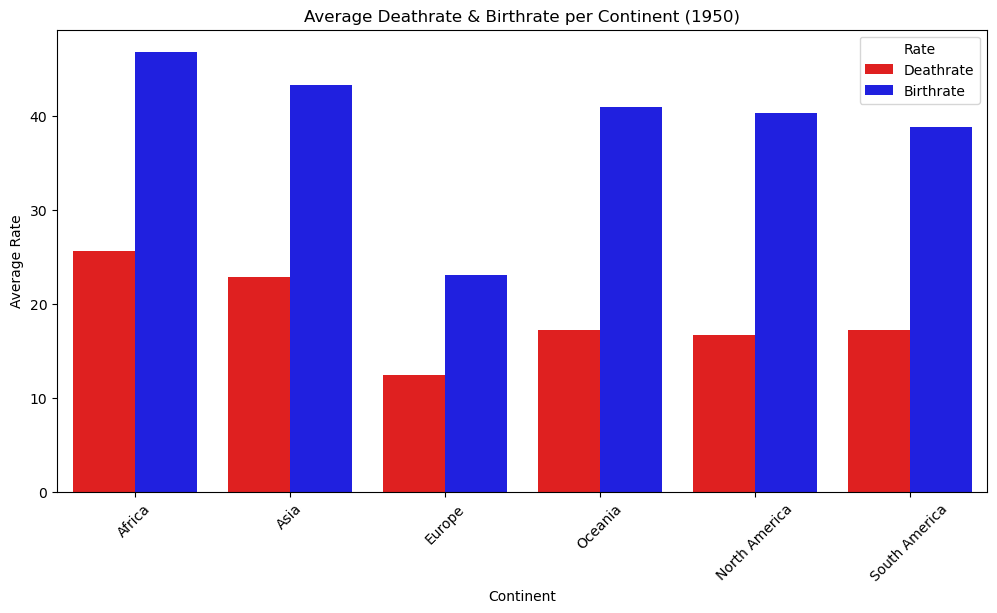

In [190]:
# Define the continents, colors, and markers for plotting
continents = ["Africa", "Asia", "Europe", "Oceania", "North America", "South America"]
colors = ["brown", "yellow", "green", "blue", "red", "black"]
markers = ["o", "x", "D", "d", "X", "s"]

# Create a dictionary with average deathrate for each continent in 1950
deathrate_avg_1950 = {
    continent: df[(df["Continent"] == continent) & (df["Year"] == 1950)]["Deathrate"].mean()
    for continent in continents if continent in df["Continent"].values
}

# Create a dictionary with average birthrate for each continent in 1950
birthrate_avg_1950 = {
    continent: df[(df["Continent"] == continent) & (df["Year"] == 1950)]["Birthrate"].mean()
    for continent in continents if continent in df["Continent"].values
}

# Create a DataFrame to store the average birthrate and deathrate for each continent
df_plot = pd.DataFrame({
    "Continent": list(deathrate_avg_1950.keys()),
    "Deathrate": list(deathrate_avg_1950.values()),
    "Birthrate": list(birthrate_avg_1950.values())
})

# Reshape the DataFrame to make it suitable for plotting (melt it)
df_plot_melted = df_plot.melt(id_vars=["Continent"], var_name="Rate", value_name="Value")
# Set up the barplot with seaborn, showing both deathrate and birthrate
plt.figure(figsize=(12, 6))  # Set figure size
sns.barplot(x="Continent", y="Value", hue="Rate", data=df_plot_melted, palette=["red", "blue"])
# Customize the plot (remove grid, rotate x-axis labels, add labels and title)
plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Continent")
plt.ylabel("Average Rate")
plt.title("Average Deathrate & Birthrate per Continent (1950)")
# Display the legend with a title
plt.legend(title="Rate")
# Show the plot
plt.show()

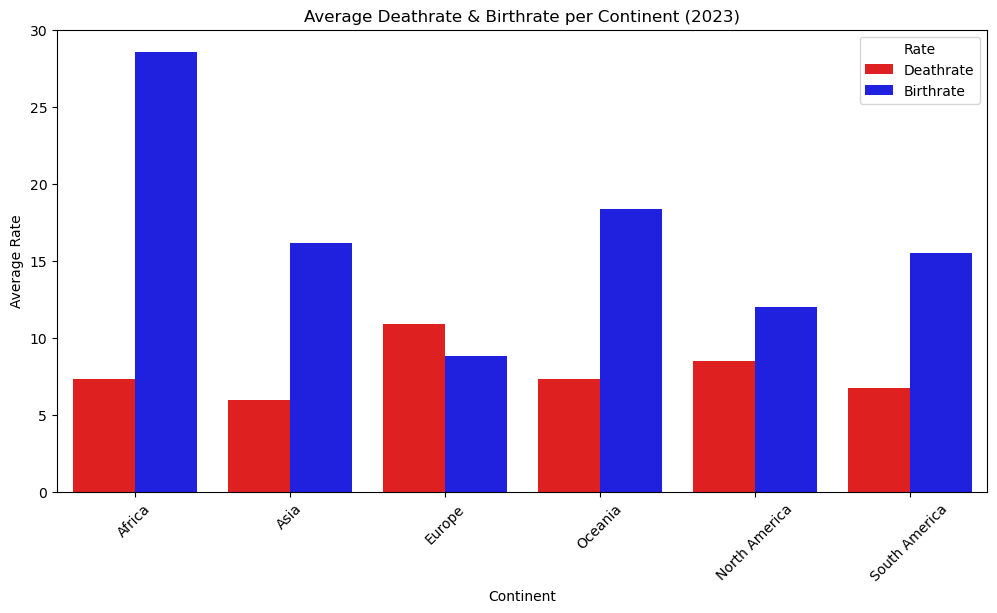

In [212]:
# Define the continents, colors, and markers for plotting
continents = ["Africa", "Asia", "Europe", "Oceania", "North America", "South America"]
colors = ["brown", "yellow", "green", "blue", "red", "black"]
markers = ["o", "x", "D", "d", "X", "s"]

# Create a dictionary with average deathrate for each continent in 2023
deathrate_avg_2023 = {
    continent: df[(df["Continent"] == continent) & (df["Year"] == 2023)]["Deathrate"].mean()
    for continent in continents if continent in df["Continent"].values
}

# Create a dictionary with average birthrate for each continent in 2023
birthrate_avg_2023 = {
    continent: df[(df["Continent"] == continent) & (df["Year"] == 2023)]["Birthrate"].mean()
    for continent in continents if continent in df["Continent"].values
}

# Create a DataFrame to store the average birthrate and deathrate for each continent in 2023
df_plot2 = pd.DataFrame({
    "Continent": list(deathrate_avg_2023.keys()),
    "Deathrate": list(deathrate_avg_2023.values()),
    "Birthrate": list(birthrate_avg_2023.values())
})

# Reshape the DataFrame to make it suitable for plotting (melt it)
df_plot_melted2 = df_plot2.melt(id_vars=["Continent"], var_name="Rate", value_name="Value")
# Set up the barplot with seaborn, showing both deathrate and birthrate for 2023
plt.figure(figsize=(12, 6))  # Set figure size
sns.barplot(x="Continent", y="Value", hue="Rate", data=df_plot_melted2, palette=["red", "blue"])
# Customize the plot (remove grid, rotate x-axis labels, add labels and title)
plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Continent")
plt.ylabel("Average Rate")
plt.title("Average Deathrate & Birthrate per Continent (2023)")
# Display the legend with a title
plt.legend(title="Rate")
# Show the plot
plt.show()

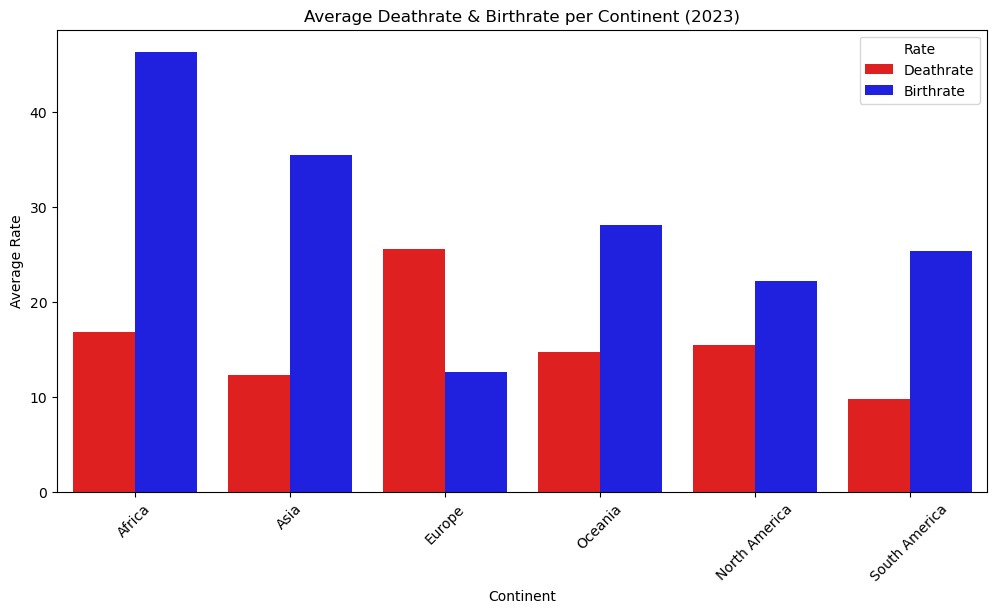

In [218]:
# Define the continents, colors, and markers for plotting
continents = ["Africa", "Asia", "Europe", "Oceania", "North America", "South America"]
colors = ["brown", "yellow", "green", "blue", "red", "black"]
markers = ["o", "x", "D", "d", "X", "s"]

# Create a dictionary with the maximum deathrate for each continent in 2023
deathrate_max_2023 = {
    continent: df[(df["Continent"] == continent) & (df["Year"] == 2023)]["Deathrate"].max()
    for continent in continents if continent in df["Continent"].values
}

# Create a dictionary with the maximum birthrate for each continent in 2023
birthrate_max_2023 = {
    continent: df[(df["Continent"] == continent) & (df["Year"] == 2023)]["Birthrate"].max()
    for continent in continents if continent in df["Continent"].values
}

# Create a DataFrame to store the maximum birthrate and deathrate for each continent in 2023
df_plot_max = pd.DataFrame({
    "Continent": list(deathrate_max_2023.keys()),
    "Deathrate": list(deathrate_max_2023.values()),
    "Birthrate": list(birthrate_max_2023.values())
})

# Reshape the DataFrame to make it suitable for plotting (melt it)
df_plot_melted_max = df_plot_max.melt(id_vars=["Continent"], var_name="Rate", value_name="Value")
# Set up the barplot with seaborn, showing both deathrate and birthrate maximum values for 2023
plt.figure(figsize=(12, 6))  # Set figure size
sns.barplot(x="Continent", y="Value", hue="Rate", data=df_plot_melted_max, palette=["red", "blue"])
# Customize the plot (remove grid, rotate x-axis labels, add labels and title)
plt.grid(False)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Continent")
plt.ylabel("Max Rate")
plt.title("Maximum Deathrate & Birthrate per Continent (2023)")
# Display the legend with a title
plt.legend(title="Rate")
# Show the plot
plt.show()

In [252]:
# Filter the dataset for data from the year 2021 and for the country "Ukraine"
df_ukrania = df[(df["Year"] == 2021) & (df["Country"] == "Ukraine")]

In [280]:
df_ukrania

,Country,Code,Year,Birthrate,Deathrate,Population,Continent
16425,Ukraine,UKR,2021,6.98,17.13,44298641,Europe


In [274]:
# Filter the European dataset to get the row with the maximum deathrate
df_europe_deathrate = df_europe[df_europe["Deathrate"] == df_europe["Deathrate"].max()]

In [276]:
df_europe_deathrate

,Country,Code,Year,Birthrate,Deathrate,Population,Continent
17019,Vatican,VAT,2023,4.21,25.58,501,Europe


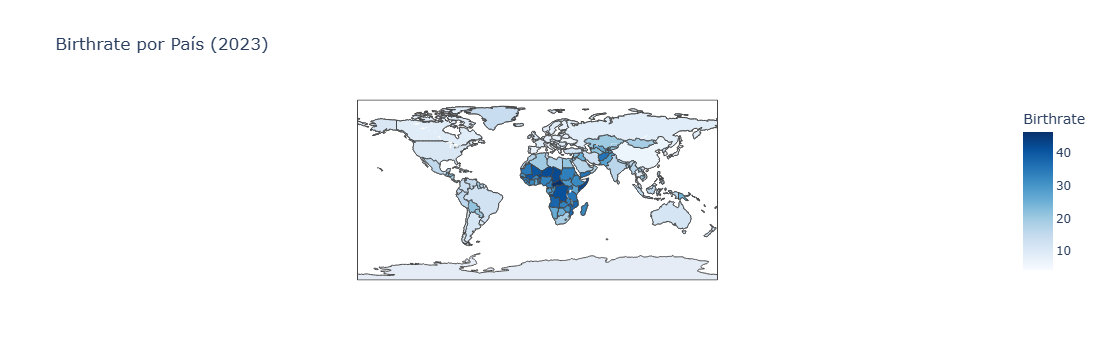

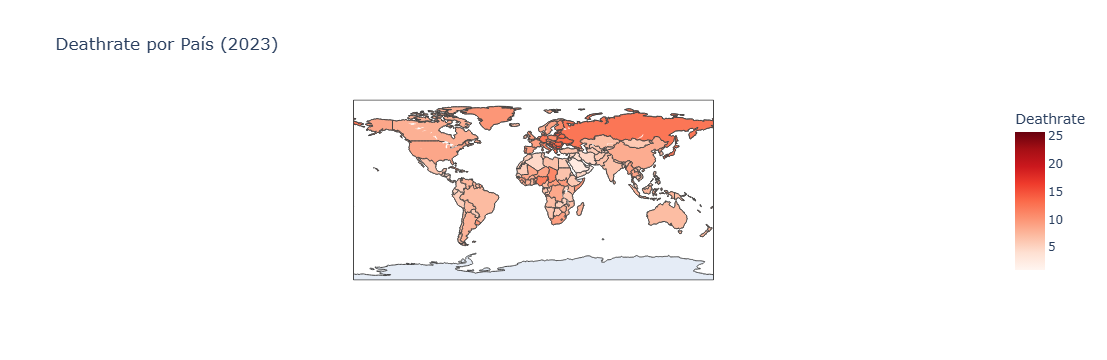

In [286]:
# Filter the dataset to include only data from the year 2023
df_2023 = df[df["Year"] == 2023]

# Create a choropleth map for Birthrate in 2023
fig_birthrate = px.choropleth(
    df_2023,  # Data for 2023
    locations="Country",  # Column with country names
    locationmode="country names",  # Use country names for location mode
    color="Birthrate",  # Column for the color scale
    title="Birthrate por País (2023)",  # Title of the map
    color_continuous_scale="Blues",  # Color scale for birthrate (shades of blue)
)

# Show the Birthrate map
fig_birthrate.show()

# Create a choropleth map for Deathrate in 2023
fig_deathrate = px.choropleth(
    df_2023,  # Data for 2023
    locations="Country",  # Column with country names
    locationmode="country names",  # Use country names for location mode
    color="Deathrate",  # Column for the color scale
    title="Deathrate por País (2023)",  # Title of the map
    color_continuous_scale="Reds",  # Color scale for deathrate (shades of red)
)

# Show the Deathrate map
fig_deathrate.show()

In [292]:
# Load the world shapefile using Geopandas to get the geometrical boundaries of countries
world = gpd.read_file("C:\\Users\\GonDesktop\\Documents\\Github\\PortfolioProjects\\BirthRate_SQLProject\\Map\\ne_110m_admin_0_countries.shp")

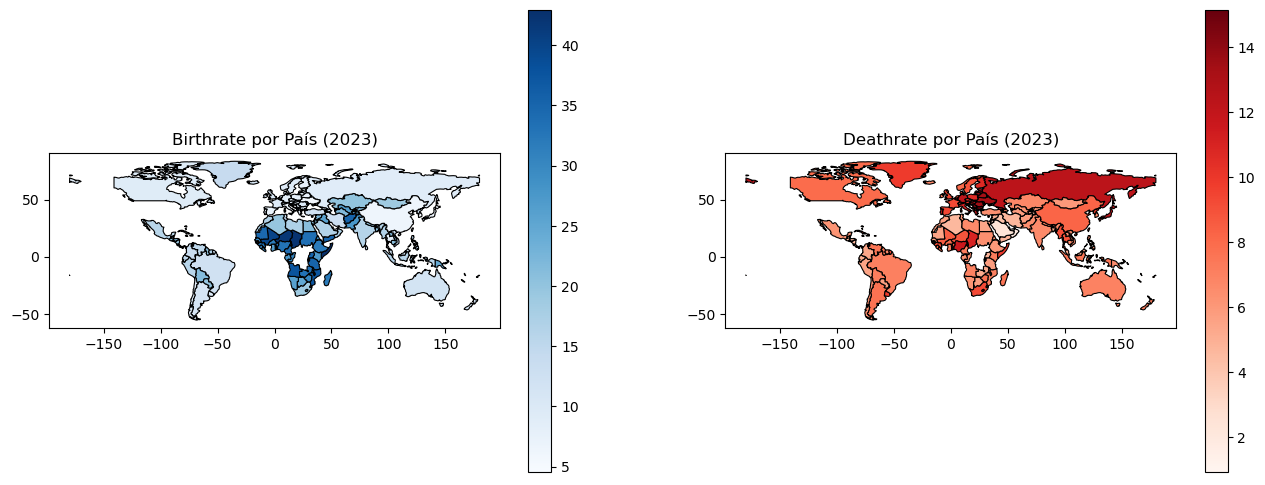

In [296]:
# Filter the dataset for data from the year 2023
df_2023 = df[df["Year"] == 2023]

# Merge the world shapefile with the 2023 data on the country name
world = world.merge(df_2023, left_on="NAME", right_on="Country", how="left")

# Create two subplots to display both maps (Birthrate and Deathrate)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the map for Birthrate with a blue color scale
world.plot(column="Birthrate", cmap="Blues", linewidth=0.8, edgecolor="black", legend=True, ax=ax[0])
ax[0].set_title("Birthrate per Country (2023)")  # Title for the Birthrate map

# Plot the map for Deathrate with a red color scale
world.plot(column="Deathrate", cmap="Reds", linewidth=0.8, edgecolor="black", legend=True, ax=ax[1])
ax[1].set_title("Deathrate per Country (2023)")  # Title for the Deathrate map

# Show the plots
plt.show()